In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from scipy.ndimage.filters import gaussian_filter1d

%matplotlib inline

40.0
30.88224
40.0
30.88336


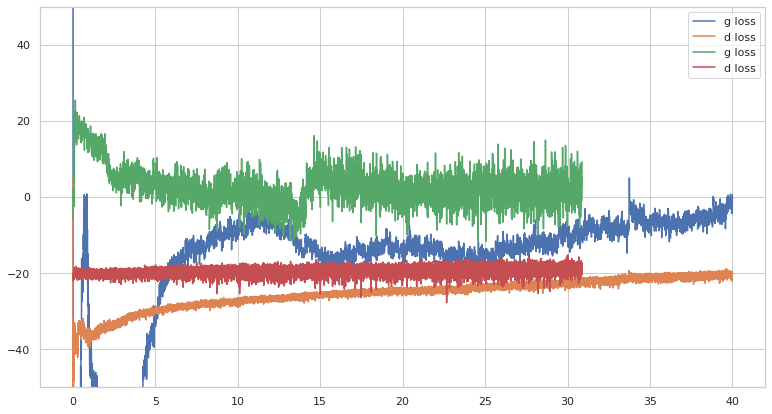

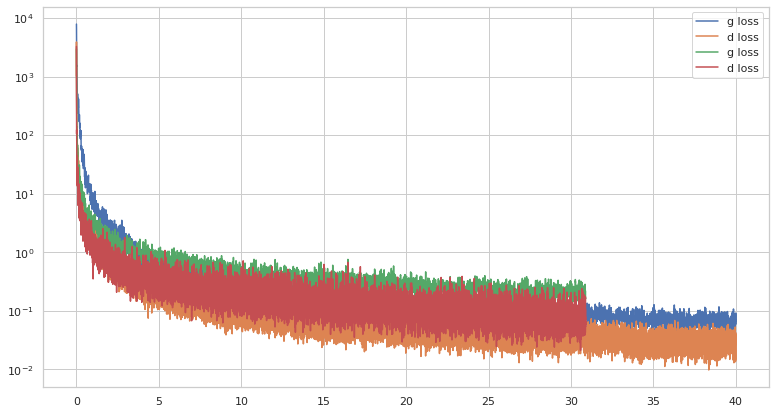

In [5]:
experiment_ids = ["f833f5c803c148bd91d25de4f49cee81","6c187e10f7ad45c8b6e6ebb7c0b15d31"]
experiment_num = 43
#experiment_num = 37
#experiment_num = 39
sigma=5

sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(13, 7))
nsample = 6250
for experiment_id in experiment_ids:
    mlflow_dir = "/home/dwhan89/workspace/cosmikyu/output/mlruns/{}/{}/metrics".format(experiment_num, experiment_id)
    def mlflow_path(x):
        return os.path.join(mlflow_dir, x)

    g_loss = np.loadtxt(mlflow_path('G loss'))
    d_loss = np.loadtxt(mlflow_path('D loss'))

    xg = np.linspace(0, len(d_loss[:,0])/nsample, len(g_loss[:,0]))
    xd = np.linspace(0, len(d_loss[:,0])/nsample, len(d_loss[:,0])) 
    print(np.max(xg))


    plt.plot(xg, gaussian_filter1d(g_loss[:,1], sigma=sigma), label="g loss", alpha=1)
    plt.plot(xd, gaussian_filter1d(d_loss[:,1], sigma=sigma), label="d loss", alpha=1)
#plt.xlim(0,20)
plt.ylim(-50,50)
plt.legend()

sigma=5
sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(13, 7))
for experiment_id in experiment_ids:
    mlflow_dir = "/home/dwhan89/workspace/cosmikyu/output/mlruns/{}/{}/metrics".format(experiment_num, experiment_id)

    def mlflow_path(x):
        return os.path.join(mlflow_dir, x)


    g_loss = np.loadtxt(mlflow_path('G loss'))
    d_loss = np.loadtxt(mlflow_path('D loss'))

    xg = np.linspace(0, len(d_loss[:,0])/nsample, len(g_loss[:,0]))
    xd = np.linspace(0, len(d_loss[:,0])/nsample, len(d_loss[:,0])) 
    print(np.max(xg))
    
    plt.plot((xg[:-1]+xg[1:])/2, (gaussian_filter1d(np.abs((g_loss[1:,1]-g_loss[:-1,1])/(xg[:-1]+xg[1:])), sigma=sigma)), label="g loss")
    plt.plot((xd[:-1]+xd[1:])/2, (gaussian_filter1d(np.abs((d_loss[1:,1]-d_loss[:-1,1])/(xd[:-1]+xd[1:])), sigma=sigma)), label="d loss")
    #plt.ylim(-50,50)
#plt.xlim(0,5)
plt.yscale("log")

plt.legend()
